# Supervised classification with DeapLearning

### Importin the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from helpers import undersampling
from helpers import show_target_pred_dif
from configparser import ConfigParser

Wczytujemy dane konfiguracyjne

In [2]:
config = ConfigParser()
config.read('config.ini')
x_size = int(config['main']['x_size'])
y_size = int(config['main']['y_size'])
clases_names = list(config['classes'].values())
nr_of_classes = len(clases_names)
csv_data_file = config['main']['csv_data_file']

### Preprocessing

Wczytujemy dane

In [3]:
df_unchange = pd.read_csv(csv_data_file)
X = df_unchange.iloc[:,:-nr_of_classes].to_numpy()
Y = df_unchange.iloc[:,-nr_of_classes:].to_numpy()

Dzielimy na uczący i testujący

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Feature scaling
$$x = \frac{\overline{x} - x}{\sigma_{x}}$$

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Model definition

In [6]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training

In [8]:
model.fit(X_train, y_train, epochs=10, batch_size=10000)

Epoch 1/10
18/18 [==============================] - 0s 7ms/step - loss: 0.4336 - accuracy: 0.5482
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 0.3218 - accuracy: 0.6723
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.7169
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2765 - accuracy: 0.7361
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.7487
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2598 - accuracy: 0.7561
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2554 - accuracy: 0.7613
Epoch 8/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2514 - accuracy: 0.7653
Epoch 9/10
18/18 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.7689
Epoch 10/10
18/18 [==============================] - 0s 6ms/step - loss: 0.2455 - accuracy: 0.7711


### Validation

In [9]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'acc: {accuracy}')

2344/2344 [==============================] - 3s 1ms/step - loss: 0.2267 - accuracy: 0.7862
acc: 0.7862133383750916


### Predictions

In [10]:
y_pred = model.predict(X_test)

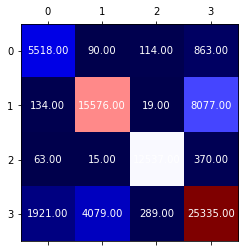

In [11]:
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
fig, ax = plt.subplots()
ax.matshow(cm, cmap='seismic')
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',color = 'white')
plt.show()

### Results Presentation

In [12]:
X_present = df_unchange.iloc[:,:-nr_of_classes].to_numpy()
X_present = sc.fit_transform(X_present)
Y_present = model.predict(X_present)
Y_present = np.rint(Y_present)
Y_present = Y_present.reshape((x_size,y_size,4))

In [13]:
Y_target = df_unchange.iloc[:,-nr_of_classes:].to_numpy()
Y_target = Y_target.reshape((x_size,y_size,nr_of_classes))

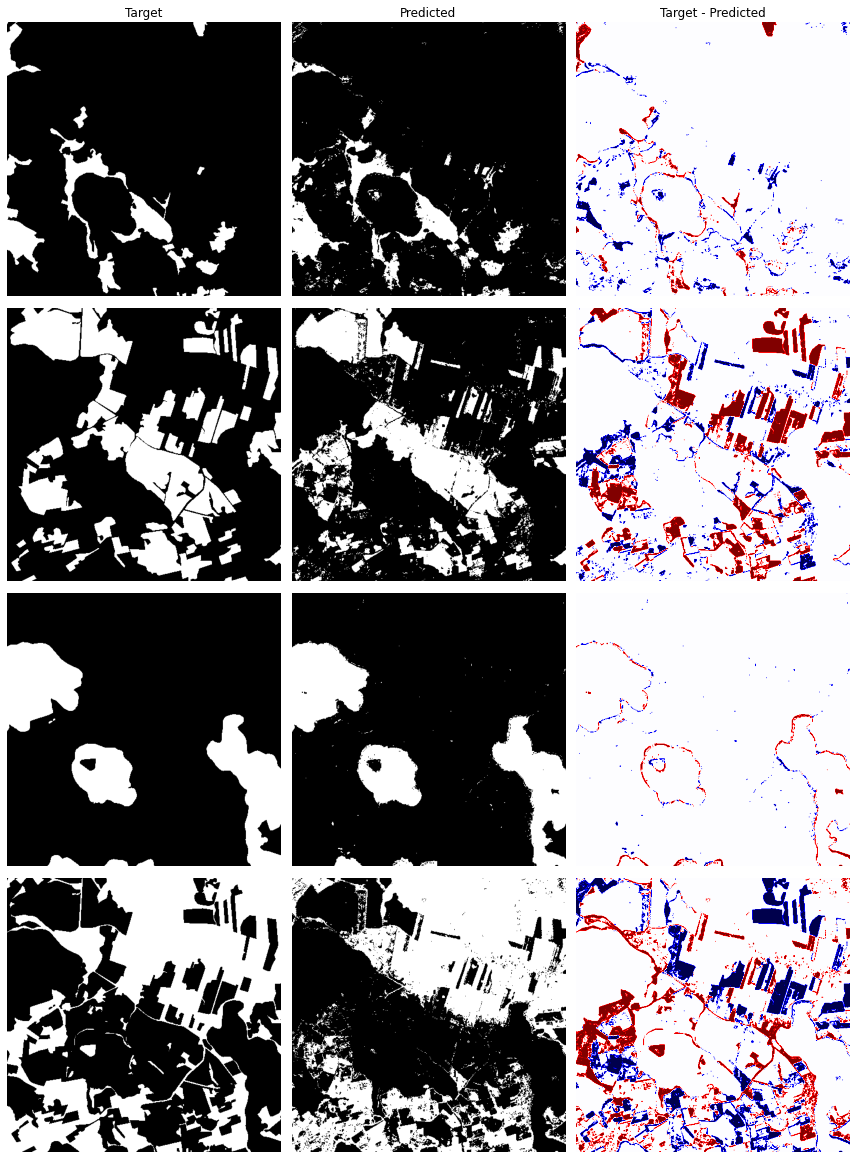

In [14]:
show_target_pred_dif(Y_target, Y_present)